# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

### Solution Approach

    Data Understanding
    Data Cleansing
    Deeper Data Understanding by Visualization
    Preparing the Data for Modelling
    Splitting the date into Train and Test
    Scaling the train Data (Fit & transform)
    Linear Regression Model creation
    Scaling the test Data (Only Transform)
    LR Residual Analysis to check the non-linearity of Data
    LR Model Validation
    Ridge Regression
    Lasso REgression
    Comparision of LR, Ridge and Lasso regression
    Comparision of Coefficients. 
    Detailing of which coefficients have higher influence on target variable.

### Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleansing


In [6]:
# Data elements with some data missing are as follows: 
#MiscFeature (only 54 elements)
#Fence (only 281 elements)
#PoolQC (only 7 elements)
#Alley          91 non-null     object
#FireplaceQu    770 non-null    object
#LotFrontage    1201 non-null   float64
#GarageQual     1379 non-null   object 
#GarageCond     1379 non-null
#GarageType     1379 non-null   object 
#GarageYrBlt    1379 non-null   float64
#GarageFinish   1379 non-null   object 
#Electrical     1459 non-null   object
#BsmtFinType2   1422 non-null   object
#BsmtQual       1423 non-null   object 
#BsmtCond       1423 non-null   object 
#BsmtExposure   1422 non-null   object 
#BsmtFinType1   1423 non-null   object 
#MasVnrType     1452 non-null   object 
#MasVnrArea     1452 non-null   float64

### Removing Columns where significant amount of Data is missing

In [7]:
dataset.drop('MiscFeature', axis='columns', inplace=True)

In [8]:
dataset.drop('Fence', axis='columns', inplace=True)

In [9]:
dataset.drop('PoolQC', axis='columns', inplace=True)

In [10]:
dataset.drop('Alley', axis='columns', inplace=True)

In [11]:
dataset.drop('FireplaceQu', axis='columns', inplace=True)

In [12]:
# There are only 1201 elements in this column. Which means about 17% of data is missing. Hence taking a decision to remove the entire column, rather than data transformation
dataset.drop('LotFrontage', axis='columns', inplace=True)

In [13]:
newdataset = dataset

### Removing Rows that have Null values.

In [14]:
newdataset = newdataset.dropna()

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

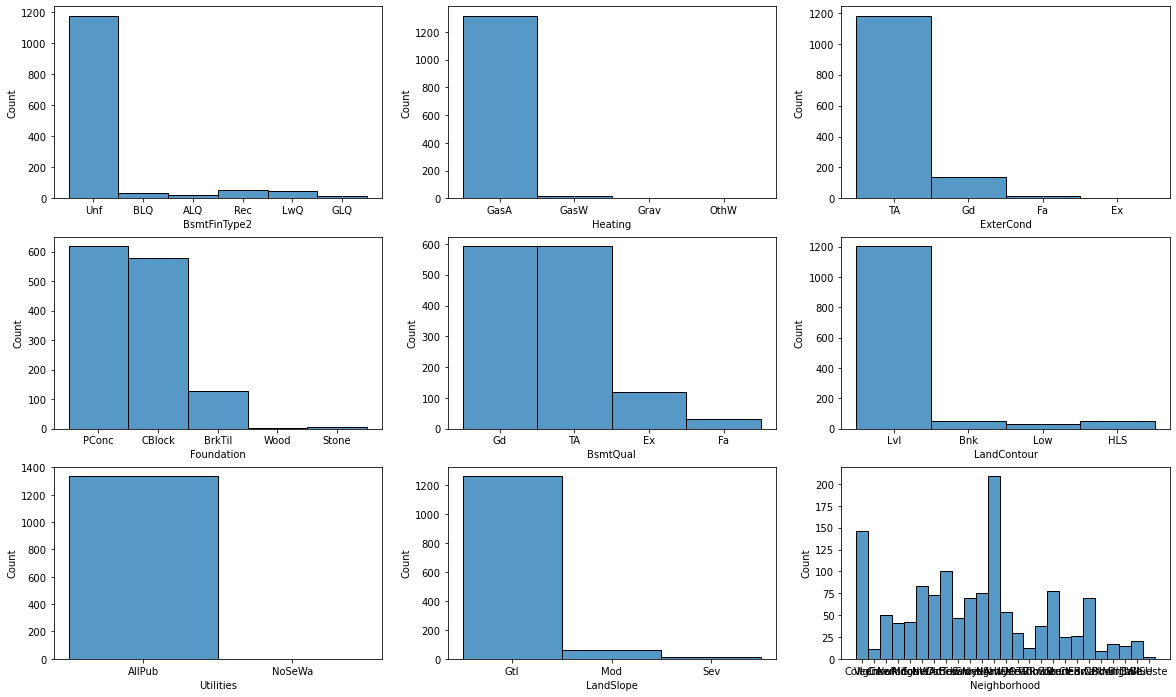

In [15]:
# Randomly checking if there are any Data Anomolies or Structural Errors. And did not find any.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.histplot(newdataset['BsmtFinType2'])
plt.subplot(3,3,2)
sns.histplot(newdataset['Heating'])
plt.subplot(3,3,3)
sns.histplot(newdataset['ExterCond'])
plt.subplot(3,3,4)
sns.histplot(newdataset['Foundation'])
plt.subplot(3,3,5)
sns.histplot(newdataset['BsmtQual'])
plt.subplot(3,3,6)
sns.histplot(newdataset['LandContour'])
plt.subplot(3,3,7)
sns.histplot(newdataset['Utilities'])
plt.subplot(3,3,8)
sns.histplot(newdataset['LandSlope'])
plt.subplot(3,3,9)
sns.histplot(newdataset['Neighborhood'])

# Data Visualization

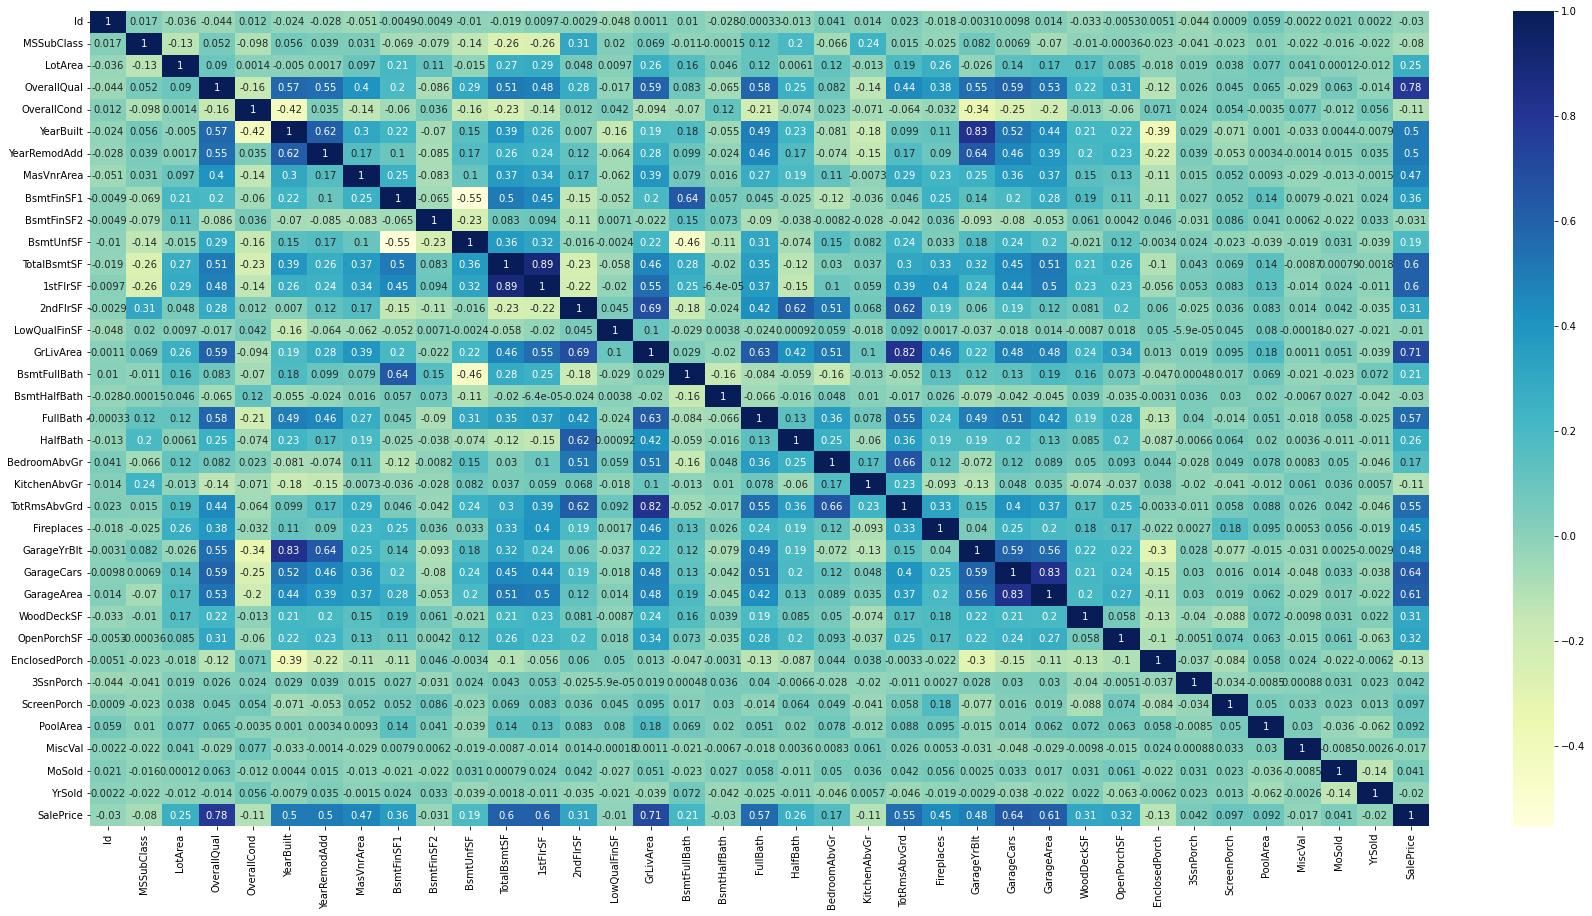

In [16]:
# Correlation with heatmap comparision
plt.figure(figsize=(30,15))
sns.heatmap(newdataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Data transformation for Model Building
### Creating Dummy Variables in order to convert all catogorical variables

In [17]:
dataset3 = pd.get_dummies(newdataset, drop_first=True)

In [18]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 228 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(35), uint8(191)
memory usage: 646.8 KB


In [19]:
dataset3.drop('Id', axis=1, inplace=True)

# Splitting the date into Train and Test data

In [310]:
df_train, df_test = train_test_split(dataset3, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(936, 227)
(402, 227)


# Re-scaling of train dataset 
### Re-scaling the dataset is important because, the coefficients of two independent variables might differ hugely once we train the model
There are two techniques:
Min-Max scaling - also called as normalization - entire data gets compressed between 0 and 1 - formula: (x-xmin)/(xmax-xmin)
Standardization - mean is 0 and sigma(stdev) is 1 - formula: (x-mean)/sigma

In [311]:
# 1. Instantiate an Object

scaler = MinMaxScaler()

# create the list of variables that need to undergo scaling: should be the entire train data
scalerlist = list(df_train.columns.values)

# 2. Fit on the data
# three parts to this: fit-learns the xmin, and xmax, transform-does the transformation, fit_transform-does the replacement. here we will use fit-transform directly
df_train[scalerlist] = scaler.fit_transform(df_train[scalerlist])

In [312]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1059,0.176471,0.063253,0.500,0.714286,0.393701,0.000000,0.300000,0.131416,0.377883,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
571,0.000000,0.038250,0.500,0.571429,0.606299,0.150000,0.129375,0.183186,0.000000,0.192637,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
173,0.000000,0.056417,0.500,0.428571,0.622047,0.183333,0.306875,0.127434,0.253731,0.299658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.235294,0.064071,0.625,0.428571,0.913386,0.816667,0.126250,0.111504,0.000000,0.385702,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1282,0.000000,0.047559,0.375,0.714286,0.748031,0.966667,0.000000,0.235398,0.097693,0.155822,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Creating x and y variables out of df_train

In [313]:
y_train = df_train.pop('SalePrice')
x_train = df_train

In [314]:
x_train.shape


(936, 226)

# Building the Linear Regression model

In [315]:
#Instantiating the Linear Regression Object
lm = LinearRegression()

In [316]:
lm.fit(x_train, y_train)

LinearRegression()

In [317]:
rfeparams = 20

In [318]:
rfe = RFE(lm,rfeparams)

In [319]:
# Fitting our train data into the object
reg = rfe.fit(x_train, y_train)

In [320]:
# Getting the predictions of Y variables
y_train_pred = reg.predict(x_train)

In [321]:
# Comparing the actuals v/s predictions with the help of r2
r2_score(y_train, y_train_pred)

0.8326574296153352

In [322]:
# print(reg.intercept_)
print(reg.estimator_.coef_)

[ 0.19327078  0.17645623  0.25870318  0.17253024  0.18067751 -0.13380538
  0.1175221  -0.34550446 -0.15617226 -0.11148102 -0.13547701 -0.13552837
 -0.17929364 -0.14012361 -0.24822661 -0.16422008  0.13592199  0.13313074
  0.18611109  0.1440637 ]


In [323]:
#Metrics to give an overall sense of the model
rss = np.sum(np.square(y_train-y_train_pred))
print(rss)

mse = mean_squared_error(y_train, y_train_pred)
print(mse)

rmse = mse**0.5
print(rmse)

1.8742335952077993
0.0020023863196664523
0.04474803146135539


# Residual Analysis

### Check for non-linearity in Data
     Conditions needed to meet the linearity in data:
       1. The residuals are scattered randomly around 0
       2. The spread of residuals remains constant.
       3. There are no extreme points

In [324]:
y_train_res = y_train - y_train_pred

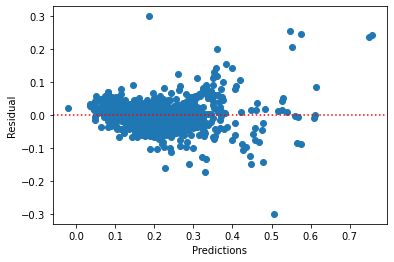

In [325]:
df_train['res'] = y_train_res
plt.scatter(y_train_pred, df_train['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

In [326]:
df_train.drop('res',  axis=1, inplace=True)

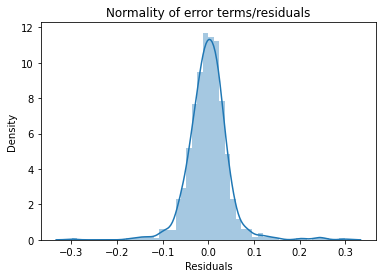

In [327]:
p = sns.distplot(y_train_res, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.show()

### We can see that all conditions of linearity are met, and also the distplot shows normal plot - and therefore we will not do any data transformation, or polynomial regression or non-linear regression

### Creating x and y variables out of df_test

In [328]:
df_test_backup = df_test

In [329]:
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,20,12968,5,6,1962,1962,0.0,737,0,175,...,0,0,0,0,1,0,0,0,1,0
335,190,164660,5,6,1965,1965,0.0,1249,147,103,...,0,0,0,0,1,0,0,0,1,0
348,160,2448,7,5,2003,2004,106.0,573,0,191,...,0,0,0,0,1,0,0,0,1,0
885,120,5119,9,5,1999,2000,60.0,1238,0,460,...,0,0,0,0,0,0,0,0,0,0
175,20,12615,6,7,1950,2001,0.0,477,0,725,...,0,0,0,0,1,0,0,0,1,0


# Scaling of test Data

In [330]:


# create the list of variables that need to undergo scaling:
scalerlist2=list(df_test.columns.values)

# 2. Fit on the data
# three parts to this: fit-learns the xmin, and xmax, transform-does the transformation, fit_transform-does the replacement. here we will use transform directly
df_test[scalerlist] = scaler.transform(df_test[scalerlist])

In [331]:
df_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.0,402.000000,402.0,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.220296,0.063808,0.532649,0.519545,0.713069,0.586401,0.069916,0.211793,0.032610,0.254124,...,0.004975,0.0,0.084577,0.0,0.858209,0.002488,0.007463,0.014925,0.810945,0.087065
std,0.241307,0.094744,0.168837,0.157428,0.242938,0.341088,0.116173,0.225595,0.108859,0.196136,...,0.070447,0.0,0.278598,0.0,0.349270,0.049875,0.086171,0.121405,0.392040,0.282281
min,0.000000,0.002410,0.000000,0.000000,-0.015748,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.039824,0.375000,0.428571,0.582677,0.283333,0.000000,0.000000,0.000000,0.097389,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.235294,0.052143,0.500000,0.428571,0.740157,0.733333,0.000000,0.190044,0.000000,0.205693,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.068375,0.625000,0.571429,0.944882,0.895833,0.108750,0.329757,0.000000,0.362586,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.356658,1.000000,1.000000,1.007874,1.000000,0.705625,2.497345,0.736092,0.875856,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [332]:
y_test = df_test.pop('SalePrice')
x_test = df_test

In [333]:
y_test_pred = reg.predict(x_test)


# Linear Regression Model Evaluation

In [334]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8326574296153352
0.5718110151035788
1.8742335952077993
2.0776723834934394
0.0020023863196664523
0.005168339262421491


# Ridge Regression

In [335]:
# list of alphas to tune - if the value is too high it will lead to undercutting, if the value is too low it will lead to overfitting. 
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
rid = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = rid, param_grid = params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [336]:
print(model_cv.best_params_)

{'alpha': 5}


#### Fitting the ridge regression with optimum alpha/lamda on the training set again

In [337]:
alpha = 5
rid = Ridge(alpha=alpha)

In [338]:
rid.fit(x_train, y_train)

Ridge(alpha=5)

In [339]:
rfe = RFE(rid, rfeparams)

In [340]:
ridge = rfe.fit(x_train, y_train)

In [341]:
ridge.estimator_.coef_

array([ 0.05355297,  0.12908182,  0.0531429 ,  0.05342173,  0.07105821,
        0.09684732,  0.08707141,  0.07257287,  0.09430843, -0.06199163,
        0.05766999,  0.07260515,  0.05215286, -0.07240626,  0.05674003,
       -0.0486738 , -0.06309165, -0.06473784, -0.01744617, -0.02202391])

In [342]:
y_train_predr = ridge.predict(x_train)

In [343]:
y_test_predr = ridge.predict(x_test)

# Ridge Regression Model Evaluation

In [344]:
metric2 = []
r2_train_lrr = r2_score(y_train, y_train_predr)
print(r2_train_lrr)
metric2.append(r2_train_lrr)

r2_test_lrr = r2_score(y_test, y_test_predr)
print(r2_test_lrr)
metric2.append(r2_test_lrr)

rss1_lrr = np.sum(np.square(y_train - y_train_predr))
print(rss1_lrr)
metric2.append(rss1_lrr)

rss2_lrr = np.sum(np.square(y_test - y_test_predr))
print(rss2_lrr)
metric2.append(rss2_lrr)

mse_train_lrr = mean_squared_error(y_train, y_train_predr)
print(mse_train_lrr)
metric2.append(mse_train_lrr**0.5)

mse_test_lrr = mean_squared_error(y_test, y_test_predr)
print(mse_test_lrr)
metric2.append(mse_test_lrr**0.5)

0.8514421228567979
0.7211626425498503
1.6638453893382867
1.352983606527396
0.0017776125954468876
0.0033656308620084474


# Lasso Regression

In [345]:
# list of alphas to tune - if the value is too high it will lead to undercutting, if the value is too low it will lead to overfitting. 
params = {'alpha': [0.000001,0.00001,0.0002,0.0003, 0.0004, 0.0005, 0.0006,0.0001,0.001,0.002, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
las = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = las, param_grid = params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0001, 0.001, 0.002, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2, 3, 4, 5, 6, 7, 8, 9, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [346]:
print(model_cv.best_params_)

{'alpha': 0.0002}


In [347]:
alpha = 0.0002

las = Lasso(alpha=alpha)

las.fit(x_train, y_train)

Lasso(alpha=0.0002)

In [348]:
rfe = RFE(las,rfeparams)

#### Testing to see if the lambda value changes if we have limited variables as per RFE.

In [364]:
x_train.columns[~rfe.support_]

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=206)

In [365]:
x_train_rfe = x_train.drop(x_train.columns[~rfe.support_], axis=1)

In [367]:
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1059 to 861
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            936 non-null    float64
 1   OverallQual           936 non-null    float64
 2   OverallCond           936 non-null    float64
 3   YearBuilt             936 non-null    float64
 4   BsmtFinSF1            936 non-null    float64
 5   TotalBsmtSF           936 non-null    float64
 6   2ndFlrSF              936 non-null    float64
 7   GrLivArea             936 non-null    float64
 8   GarageArea            936 non-null    float64
 9   Neighborhood_Crawfor  936 non-null    float64
 10  Neighborhood_NoRidge  936 non-null    float64
 11  Neighborhood_NridgHt  936 non-null    float64
 12  Neighborhood_StoneBr  936 non-null    float64
 13  Condition2_PosN       936 non-null    float64
 14  RoofMatl_WdShngl      936 non-null    float64
 15  BsmtQual_Gd         

In [368]:
# list of alphas to tune - if the value is too high it will lead to undercutting, if the value is too low it will lead to overfitting. 
params = {'alpha': [0.000001,0.00001,0.0002,0.0003, 0.0004, 0.0005, 0.0006,0.0001,0.001,0.002, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
las = Lasso()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = las, param_grid = params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train_rfe, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0001, 0.001, 0.002, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2, 3, 4, 5, 6, 7, 8, 9, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [369]:
print(model_cv.best_params_)

{'alpha': 0.0002}


#### Testing for lamba value change Complete
# ____________________________________________

In [349]:
lasso = rfe.fit(x_train, y_train)

In [350]:
lasso.estimator_.coef_

array([-0.04126448,  0.13953675,  0.04738326,  0.08758573,  0.06095903,
        0.0802229 ,  0.03875531,  0.27421023,  0.06710269,  0.04373389,
        0.05534375,  0.0489252 ,  0.0309873 , -0.18548353,  0.06460935,
       -0.00972724,  0.037669  , -0.05333612, -0.04892505, -0.05972163])

In [351]:
y_train_predlasso = lasso.predict(x_train)

In [352]:
y_test_predlasso = lasso.predict(x_test)

# Lasso Regression Model Evaluation

In [353]:
metric3 = []
r2_train_lrlasso = r2_score(y_train, y_train_predlasso)
print(r2_train_lrlasso)
metric3.append(r2_train_lrlasso)

r2_test_lrlasso = r2_score(y_test, y_test_predlasso)
print(r2_test_lrlasso)
metric3.append(r2_test_lrlasso)

rss1_lrlasso = np.sum(np.square(y_train - y_train_predlasso))
print(rss1_lrlasso)
metric3.append(rss1_lrlasso)

rss2_lrlasso = np.sum(np.square(y_test - y_test_predlasso))
print(rss2_lrlasso)
metric3.append(rss2_lrlasso)

mse_train_lrlasso = mean_squared_error(y_train, y_train_predlasso)
print(mse_train_lrlasso)
metric3.append(mse_train_lrlasso**0.5)

mse_test_lrlasso = mean_squared_error(y_test, y_test_predlasso)
print(mse_test_lrlasso)
metric3.append(mse_test_lrlasso**0.5)

0.8822822794146349
0.7360948492250294
1.3184362243583325
1.280529072366176
0.0014085857097845434
0.003185395702403423


# Comparision of all three models

In [354]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'Rss (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)']}
lr_table2 = pd.DataFrame(lr_table, columns = ['Metric'])
lr_metric = pd.Series(metric, name= 'Linear Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_table2,lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.832657,0.851442,0.882282
1,R2 Score (Test),0.571811,0.721163,0.736095
2,Rss (Train),1.874234,1.663845,1.318436
3,RSS (Test),2.077672,1.352984,1.280529
4,MSE (Train),0.044748,0.042162,0.037531
5,MSE (Test),0.071891,0.058014,0.056439


# Changes in coefficients after regularization

In [355]:
betas = pd.DataFrame(index=x_train.columns[rfe.support_])

In [356]:
betas.rows = x_train.columns[rfe.support_]

In [357]:
betas['Linear'] = reg.estimator_.coef_

In [358]:
betas['Ridge'] = ridge.estimator_.coef_

In [359]:
betas['Lasso'] =lasso.estimator_.coef_

In [360]:
pd.set_option('display.max_rows', None)
betas.head(230).sort_values(["Ridge"], ascending=False)

,Linear,Ridge,Lasso
OverallQual,0.176456,0.129082,0.139537
TotalBsmtSF,-0.133805,0.096847,0.080223
GarageArea,-0.156172,0.094308,0.067103
2ndFlrSF,0.117522,0.087071,0.038755
Neighborhood_NridgHt,-0.135528,0.072605,0.048925
GrLivArea,-0.345504,0.072573,0.274210
BsmtFinSF1,0.180678,0.071058,0.060959
Neighborhood_NoRidge,-0.135477,0.057670,0.055344
RoofMatl_WdShngl,-0.248227,0.056740,0.064609
MSSubClass,0.193271,0.053553,-0.041264


# Based on the comparision between Ridge and Lasso, they seem to be almost similar with Ridge being slightly better.

### As can be noted above, GrLivArea: Above grade (ground) living area square feet is the top influencer. 
#### Considering Ridge Regression, the other variables that have influence on the sales price are: 
    OverallQual
    TotalBsmtSF
    GarageArea
    2ndFlrSF
    Neighborhood_NridgHt
    GrLivArea
    BsmtFinSF1
    Neighborhood_NoRidge
    RoofMatl_WdShngl
    MSSubClass
#### Considering Lasso Regression, the other variables that have influence on Sales Proce are:
    GrLivArea
    OverallQual
    YearBuilt
    TotalBsmtSF
    GarageArea
    RoofMatl_WdShngl
    BsmtFinSF1
    Neighborhood_NoRidge
    Neighborhood_NridgHt
    OverallCond
    Neighborhood_Crawfor